In [6]:
import os
import gc
import sys
import glob
import copy
import numpy as np
import pandas as pd
import netCDF4 as nc
import multiprocessing as mp
from datetime import datetime, timedelta
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
import matplotlib.ticker as mticker

In [7]:
PLUMBER2_path = "/g/data/w97/mm3972/scripts/PLUMBER2/LSM_VPD_PLUMBER2/txt/process1_output/Qle_all_sites.csv"
var_output    = pd.read_csv(PLUMBER2_path)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


FileNotFoundError: [Errno 2] No such file or directory: './plots/diurnal_cycle_obs_SWdown.png'

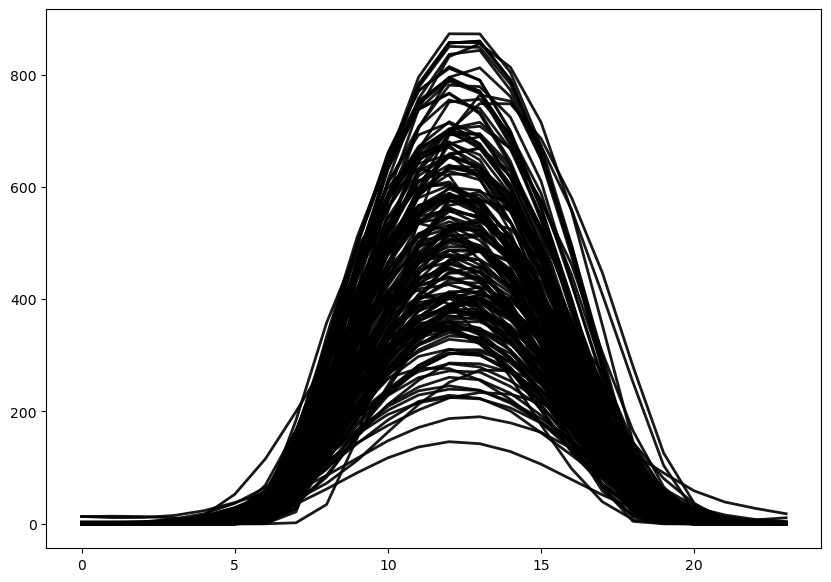

In [ ]:
model_name = 'GFDL'
var_name   = 'obs_SWdown'
PLUMBER2_path  = "/g/data/w97/mm3972/scripts/PLUMBER2/LSM_VPD_PLUMBER2/nc_files/"
all_site_path  = sorted(glob.glob(PLUMBER2_path+"/*.nc"))
site_names     = [os.path.basename(site_path).split(".")[0] for site_path in all_site_path]

fig, ax = plt.subplots(figsize=[10, 7])

for site_name in site_names:
    var_masked        = var_output[var_output['site_name'][:] == site_name]
    var_diurnal_cycle = var_masked.groupby(['hour']).mean(numeric_only=True)
    # plt.plot(var_diurnal_cycle['obs_SWdown'], lw=2.0, color='black', alpha=0.9, label=site_name)

    sct = ax.plot(var_diurnal_cycle['obs_SWdown'], lw=2.0,
                    color='black', alpha=0.9, label=model_out_name)

    if var_name == 'trans':
        ax.set_ylabel('Transpiration (mm h$\mathregular{^{-1}}$)', loc='center',size=14)# rotation=270,
    if var_name == 'latent':
        ax.set_ylabel('Latent heat (W m$\mathregular{^{-2}}$)', loc='center',size=14)# rotation=270,

ax.legend(fontsize=8,frameon=False)
fig.savefig("./plots/diurnal_cycle_"+var_name,bbox_inches='tight',dpi=300)


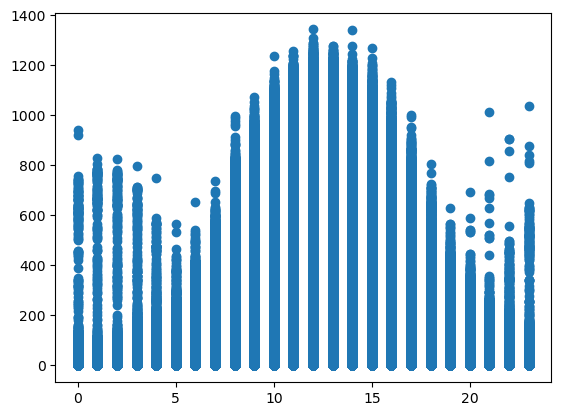

In [35]:
plt.scatter(var_output['hour'],var_output['obs_SWdown'])

(array([9.028592e+06, 4.629580e+05, 3.817040e+05, 3.209800e+05,
        2.820430e+05, 2.561020e+05, 2.341170e+05, 2.186250e+05,
        2.046530e+05, 1.914920e+05, 1.797530e+05, 1.705960e+05,
        1.631360e+05, 1.560660e+05, 1.490410e+05, 1.432150e+05,
        1.387760e+05, 1.320230e+05, 1.304100e+05, 1.269930e+05,
        1.232120e+05, 1.201020e+05, 1.167590e+05, 1.143980e+05,
        1.111850e+05, 1.105840e+05, 1.077320e+05, 1.055810e+05,
        1.039780e+05, 1.021490e+05, 9.954900e+04, 9.728900e+04,
        9.605100e+04, 9.366400e+04, 9.278900e+04, 9.125300e+04,
        8.979000e+04, 8.903600e+04, 8.743600e+04, 8.605300e+04,
        8.428700e+04, 8.270300e+04, 8.075000e+04, 7.954700e+04,
        7.817700e+04, 7.688800e+04, 7.603800e+04, 7.396700e+04,
        7.242200e+04, 7.088500e+04, 6.924400e+04, 6.796300e+04,
        6.612000e+04, 6.450800e+04, 6.374200e+04, 6.113700e+04,
        6.054000e+04, 5.799300e+04, 5.614000e+04, 5.496400e+04,
        5.297400e+04, 5.181100e+04, 4.79

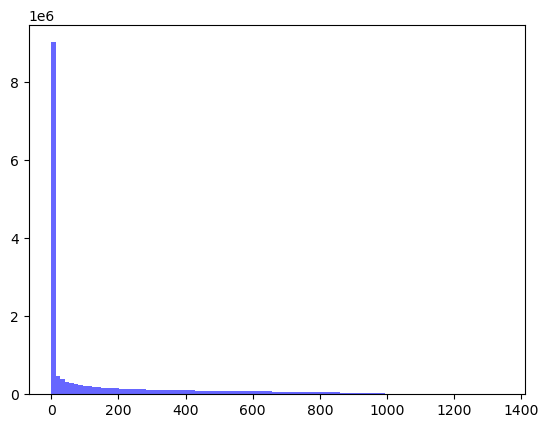

In [41]:
plt.hist(var_output['obs_SWdown'], bins=100, alpha=0.6, color='blue', histtype='stepfilled')